Yolov8에서 학습 관련 hyperparameter를 알아보겠습니다.

https://docs.ultralytics.com/usage/cfg/#train


In [1]:
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
%pip install -e .

fatal: destination path 'ultralytics' already exists and is not an empty directory.
/content/ultralytics
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.103
    Uninstalling ultralytics-8.0.103:
      Successfully uninstalled ultralytics-8.0.103
  Running setup.py develop for ultralytics


git clone하면
하이퍼 파라미터 관련 설정이 default.yaml 파일에 있습니다. 
이것을 변경해서 활용해봅시다. 

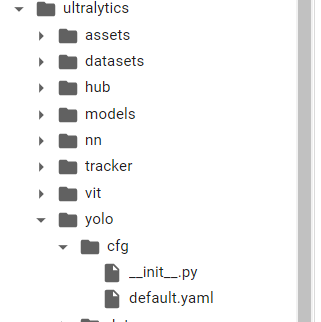

기존 코드를 활용해서 변경해보겠습니다. 

batch를 32로 변경하고, optimizer를 adam으로 변경해보겠습니다. 
이미지 사이즈도 변경해보겠습니다. 

이때 data yaml 파일 경로도 파일 안에 같이 지정해줍니다. 

In [2]:
# 모델을 불러옵시다. 
from ultralytics import YOLO
model = YOLO('yolov8n.pt')


In [3]:
# Yaml 파일을 만들어서 학습해봅시다
results = model.train( cfg = '/content/drive/MyDrive/Teaching/DL 202301/custom_cfg.yaml')  

cfg file passed. Overriding default params with /content/drive/MyDrive/Teaching/DL 202301/custom_cfg.yaml.
Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, data=/content/ultralytics/ultralytics/datasets/coco128.yaml, epochs=3, patience=50, batch=32, imgsz=[320, 320], save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes

In [4]:
# validation 데이터셋으로 정확도 평가해봅시다
results = model.val()


Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.73s/it]
                   all        128        929      0.657      0.471      0.512      0.375
                person        128        254      0.709      0.551      0.617       0.42
               bicycle        128          6      0.263      0.167      0.169      0.152
                   car        128         46      0.454      0.087      0.132     0.0644
            motorcycle        128          5      0.694        0.8      0.938      0.677
              airplane        128          6      0.847      0.833      0.858      0.747
                 

모델도 수정이 가능합니다. 
다만, 모델이 변경되면 pre-trained weight을 사용하는데 제한이 있어서 새로 학습하는 경우에 적합합니다. 

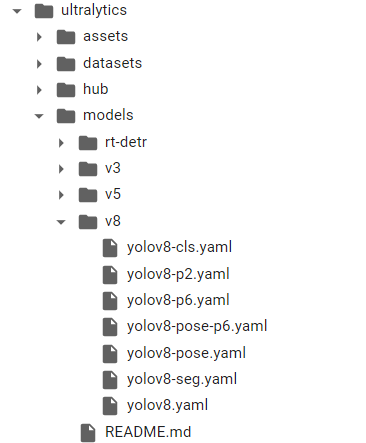

In [13]:
# 변경한 모델을 불러와 봅시다
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/Teaching/DL 202301/yolov8_custom.yaml')

WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       232  ultralytics.nn.modules.conv.Conv             [3, 8, 3, 2]                  
  1                  -1  1      1184  ultralytics.nn.modules.conv.Conv             [8, 16, 3, 2]                 
  2                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  3                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  4                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  5                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  6                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  7                  -1  2    197

In [18]:
model.train(cfg = '/content/drive/MyDrive/Teaching/DL 202301/custom_cfg.yaml')

cfg file passed. Overriding default params with /content/drive/MyDrive/Teaching/DL 202301/custom_cfg.yaml.
Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, data=/content/ultralytics/ultralytics/datasets/coco128.yaml, epochs=3, patience=50, batch=32, imgsz=[320, 320], save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes

모델 변경 시에 학습이 제대로 안 될 수 있으므로 모델 변경은 주의해서 해야 합니다. 